<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [10]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

0

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [11]:
avg_norm_loss = df["ConvertedComp"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 131596.7316197316


In [12]:
df["ConvertedComp"].replace(np.nan, avg_norm_loss, inplace=True)

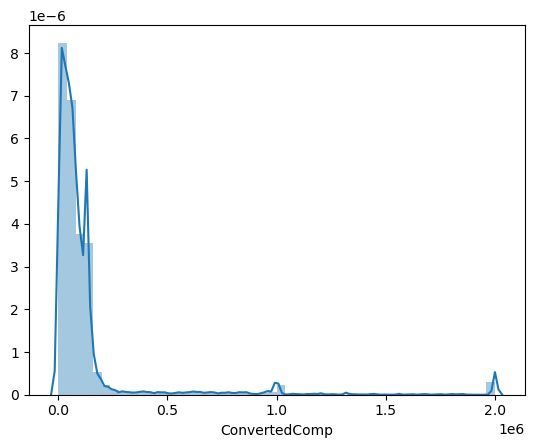

In [13]:
# your code goes here
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.distplot(df['ConvertedComp'])
plt.show()

Plot the histogram for the column `ConvertedComp`.


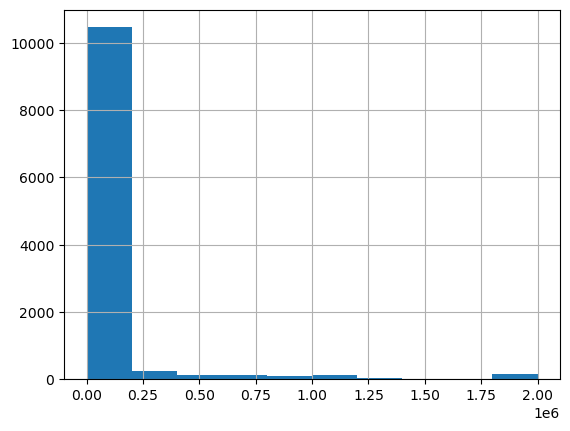

In [14]:
# your code goes here
hist = df['ConvertedComp'].hist()

What is the median of the column `ConvertedComp`?


In [15]:
# your code goes here
df['ConvertedComp'].median()

63016.0

How many responders identified themselves only as a **Man**?


In [16]:
# your code goes here
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [17]:
# your code goes here
df.loc[df['Gender'] == 'Woman', ['ConvertedComp']].median()

ConvertedComp    61071.0
dtype: float64

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [18]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


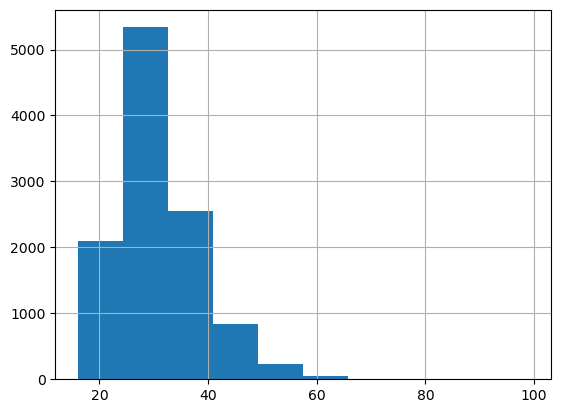

In [19]:
# your code goes here
age_hist = df['Age'].hist()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:xlabel='Age'>

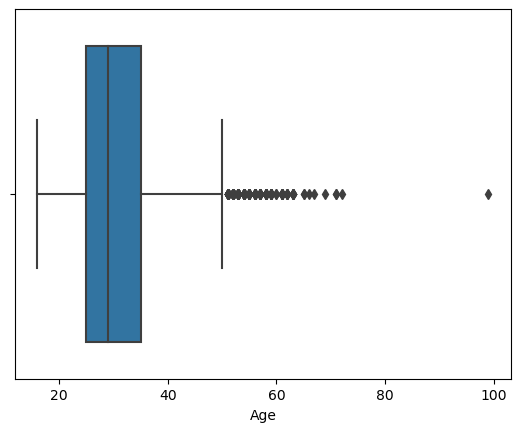

In [20]:
# your code goes here
sns.boxplot(x=df['Age'])

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [21]:
# your code goes here
df['ConvertedComp'].describe()

Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print('The middle quartiles for ConvertedComp range from',Q1, 'to',Q3,'. The interquartile range is',IQR)

The middle quartiles for ConvertedComp range from 29016.0 to 115464.0 . The interquartile range is 86448.0


Find out the upper and lower bounds.


In [22]:
# your code goes here
min_val = df['ConvertedComp'].min()
max_val = df['ConvertedComp'].max()
print('The min/max for ConvertedComp are',min_val, 'and', max_val)

The min/max for ConvertedComp are 0.0 and 2000000.0


Identify how many outliers are there in the `ConvertedComp` column.


In [23]:
# your code goes here
print('Outliers below:',df['ConvertedComp'].lt(Q1 - 1.5*IQR).sum())
print('Outliers above:',df['ConvertedComp'].gt(Q3 + 1.5*IQR).sum())
print('Outliers below:',df['ConvertedComp'].lt(Q1 - 1.5*IQR).sum())
print('Median with outliers:',df['ConvertedComp'].median())
print('Median with outliers removed:',df[df['ConvertedComp'].le(Q3 + 1.5*IQR)]['ConvertedComp'].median())
print('Mean with outliers removed:',df[df['ConvertedComp'].le(Q3 + 1.5*IQR)]['ConvertedComp'].mean())

Outliers below: 0
Outliers above: 811
Outliers below: 0
Median with outliers: 63016.0
Median with outliers removed: 57828.0
Mean with outliers removed: 66462.39312380234


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [24]:
# your code goes here
print(df.shape)
print(df['ConvertedComp'].gt(Q3 + 1.5*IQR).shape)
df1 = df[df['ConvertedComp'].le(Q3 + 1.5*IQR)]
print('total number in new dataset:',df1.shape[0])
df[df['ConvertedComp'].gt(Q3 + 1.5*IQR)].shape
print('total number of outliers removed:',df1.shape[0])
df3 = df[df['ConvertedComp'].isnull()]
print('total number of nulls removed:',df3.shape[0])
print('total of outliers + inliers + nulls:', (9703 + 879 + 816))

(11398, 85)
(11398,)
total number in new dataset: 10587
total number of outliers removed: 10587
total number of nulls removed: 0
total of outliers + inliers + nulls: 11398


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [25]:
# your code goes here
df.corr()['Age']

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.101676
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
